# Day Project : 택시 이용 데이터

## Step 1.

In [423]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from IPython.display import display

df= pd.read_csv("C:/Users/ansun/Desktop/데이터분석/과제/260205_과제/trip.csv")

plt.rcParams["font.family"] = "Malgun Gothic"  # 맑은 고딕
plt.rcParams["axes.unicode_minus"] = False #마이너스 깨짐 방지

In [424]:
# 데이터 앞에서부터 5개 나열
print("📌 1) 데이터 상위 5개")
display(df.head())


📌 1) 데이터 상위 5개


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


### 1. 결측치 판단 및 처리

In [425]:
# 데이터 구조 및 결측치 확인
print("📌 2) 데이터 구조(info)")
df.info()

print("\n 📌 3) 데이터 결측치 확인")
missing = df.isnull().sum()
display(missing[missing > 0].sort_values(ascending=False))

# 숫자 데이터 통계 요약
print("📌 4) 숫자 데이터 요약 통계(describe)")
display(df.describe().round(2))

📌 2) 데이터 구조(info)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB

 📌 3) 데이터 결측치 확인


fare_amount    3
dtype: int64

📌 4) 숫자 데이터 요약 통계(describe)


,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.00,22701.00,22698.00,22701.00,22701.00
mean,1.64,2.91,13.02,1.84,0.31
std,1.30,3.65,13.24,2.80,1.40
min,0.00,0.00,-120.00,0.00,0.00
25%,1.00,0.99,6.50,0.00,0.00
50%,1.00,1.61,9.50,1.35,0.00
75%,2.00,3.06,14.50,2.45,0.00
max,36.00,33.96,999.99,200.00,19.10


### 2. 이상치 판단 및 처리

📌 5) index scatter


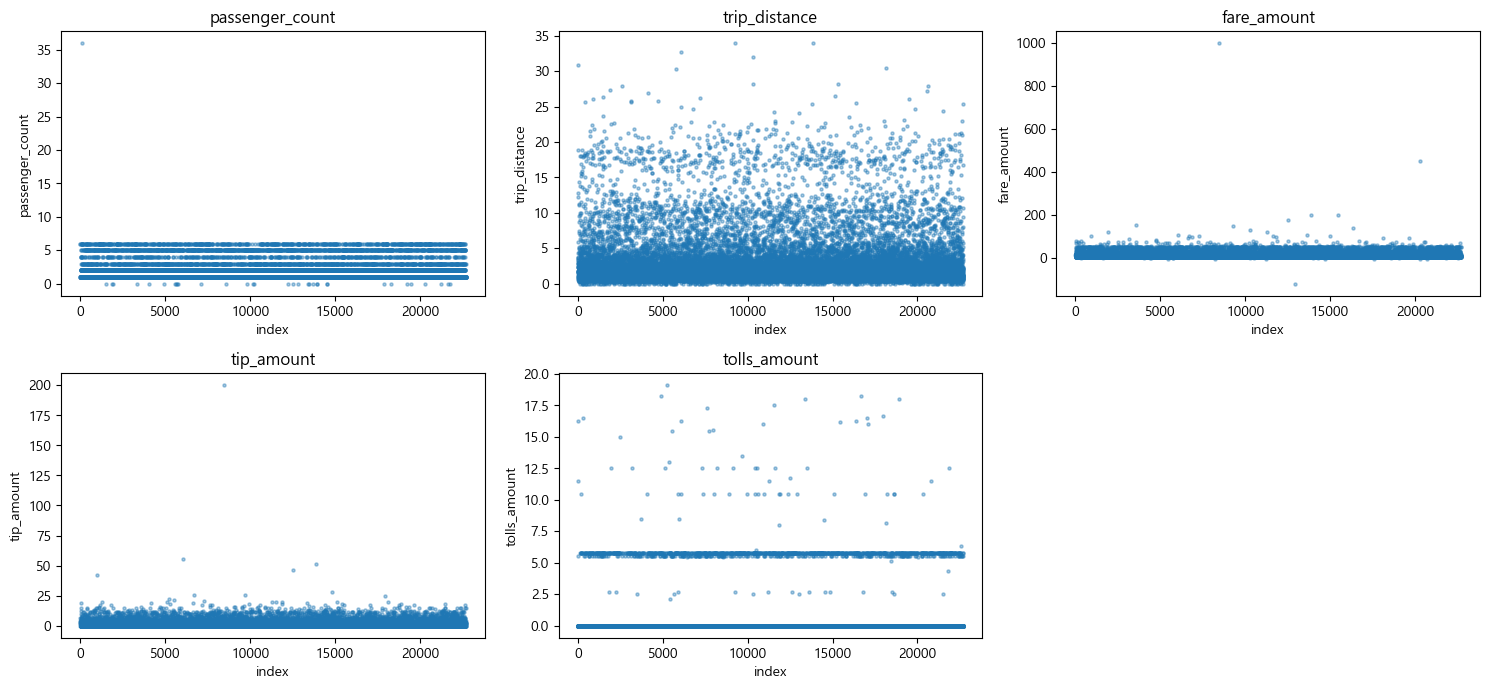

📌 6) Before(이상치 제거 전): (22701, 9)

📌 7) After(이상치 제거 후): (19697, 9)


In [426]:
# 숫자형 변수 및 산점도 시각화(index scatter)
print("📌 5) index scatter")
num_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df.index, df[col], s=5, alpha=0.4)
    plt.title(col)
    plt.xlabel("index")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


# 이상치 제거("trip_distance", "fare_amount" ← 이상치를 보인 컬럼)
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 -Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return df[(df[col] >= lower) & (df[col] <= upper)]

outlier_cols = ["trip_distance", "fare_amount"]

# 제거 전 행 수
print("📌 6) Before(이상치 제거 전):", df.shape)

#IQR 기반 이상치 제거
df = remove_outliers_iqr(df,"trip_distance")
df = remove_outliers_iqr(df, "fare_amount")

# 제거 후 행 수
print("\n📌 7) After(이상치 제거 후):", df.shape)


🔹 제거 전

✅ trip_distance → 대부분 짧은 거리 + 일부 비정상적으로 긴 거리

✅ fare_amount → 대부분 낮은 요금 + 극단적으로 큰 값 존재

🔹 제거 후
* 극단값 사라짐
* 전체 분포가 안정적으로 변함
* 값의 범위가 합리적으로 축소됨


📌 8) 이상치 제거 후 scatter


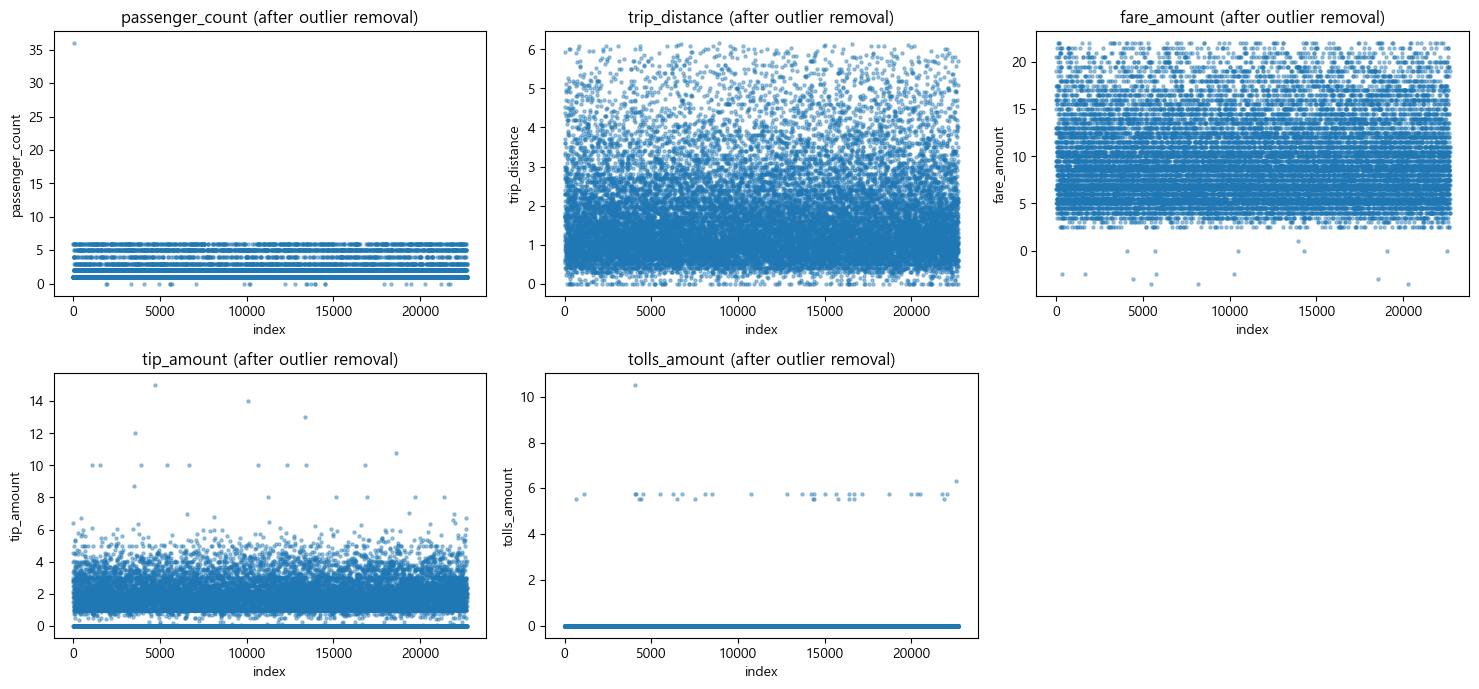

In [427]:
# 이상치 제거 후 재 확인(scatter)
print("📌 8) 이상치 제거 후 scatter")
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df.index, df[col], s=5, alpha=0.4)
    plt.title(f"{col} (after outlier removal)")
    plt.xlabel("index")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


## Step 2.

### 1. 택시 탑승 및 하차 시간을 활용할 수 있을지 고민해보세요.

In [428]:
# 컬럼명 확인
print("📌 9) 컬럼명 확인")
df.columns

# 시간으로 확인되는 컬럼 2개 찾기
# 'tpep_pickup_datetime', 'tpep_dropoff_datetime'


📌 9) 컬럼명 확인


Index(['passenger_name', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'payment_method', 'passenger_count', 'trip_distance', 'fare_amount',
       'tip_amount', 'tolls_amount'],
      dtype='object')

In [429]:
# 시간 컬럼 변환
pickup_col = "tpep_pickup_datetime"
dropoff_col = "tpep_dropoff_datetime"

df[pickup_col] = pd.to_datetime(df[pickup_col], errors="coerce")
df[dropoff_col] = pd.to_datetime(df[dropoff_col], errors="coerce")

# NaT 방지 
df = df.dropna(subset=[pickup_col, dropoff_col])

# datetime인지 확인
print("📌 10) datetime 적용 확인 \n")
print(df[pickup_col].dtype, df[dropoff_col].dtype)


📌 10) datetime 적용 확인 

datetime64[ns] datetime64[ns]


In [430]:
# 주행 시간(분 단위)
df["trip_minutes"] = (
    df[dropoff_col] - df[pickup_col]
).dt.total_seconds() / 60

#이상치 주행 사간 제거
df = df[(df["trip_minutes"] > 0) & (df["trip_minutes"] <= 300)]


In [431]:
print("📌 11) 상관계수 확인")
corr_cols = ["trip_minutes", "trip_distance", "fare_amount"]
df[corr_cols].corr().round(2)




📌 11) 상관계수 확인


,trip_minutes,trip_distance,fare_amount
trip_minutes,1.00,0.66,0.92
trip_distance,0.66,1.00,0.88
fare_amount,0.92,0.88,1.00


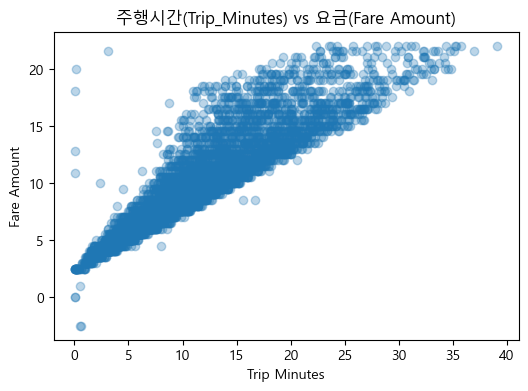

In [432]:
# 시각화(주행시간 vs 요금)
plt.figure(figsize=(6,4))
plt.scatter(df["trip_minutes"], df["fare_amount"], alpha=0.30)

plt.xlabel("Trip Minutes")
plt.ylabel("Fare Amount")

plt.title("주행시간(Trip_Minutes) vs 요금(Fare Amount)")

plt.show()

### 주행 시간(Trip Minutes) vs 요금(Fare Amount)
* 양의 상관관계
* 우상향으로 분산이 큰 패턴을 보임

→ 택시 요금은 **기본요금** + **시간/거리 요금** 구조를 따름

→ **주행 시간과 요금 사이에 명확한 양의 상관관계가 존재**

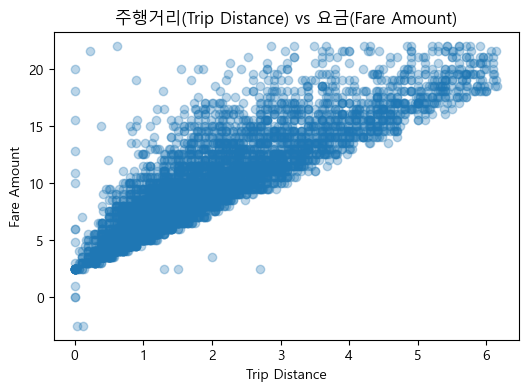

In [433]:
# 시각화(주행거리 vs 요금)
plt.figure(figsize=(6, 4))
plt.scatter(df["trip_distance"], df["fare_amount"], alpha=0.3)

plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")

plt.title("주행거리(Trip Distance) vs 요금(Fare Amount)")

plt.show()

### 주행 거리(Trip Distance) vs 요금(Fare Amount)
* 강한 양의 상관관계
* 거의 선형인 패턴을 보임

→ 거리 기반 요금 체계가 명확하게 반영

→ **주행 거리와 요금 간의 상관관계가 주행 시간보다 더 명확하다.**


※ 동일 거리에서 요금 차이가 발생하는 이유
→ 시간 요금, 통행료, 팁, 교통 상황의 차이 등


## 결론 : 택시 요금은 주행 시간보다 거리의 영향을 더 크게 받는 것으로 보여진다.

### 2. Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들어 보세요.

In [434]:
# 컬럼명 확인
df.columns

# 결제 수단 분포 확인
df["payment_method"].value_counts()

# Credit / Debit → Card로 변경
df["payment_method"] = df["payment_method"].str.strip().replace({
    "Credit Card" : "Card",
    "Debit Card": "Card"
})

# Card로 범주 통합 확인 
print("📌 12) 결제 수단")
df["payment_method"].value_counts()


📌 12) 결제 수단


payment_method
Card    3354
Cash    3273
Name: count, dtype: int64